# Screen time VS Mental Wellness. 
Mental Wellness & Screen Time Survey (400 Users)

This dataset captures insights from 400 survey participants on how their daily screen usage relates to mental wellness. With the growing prevalence of digital devices in our lives, understanding the link between screen time, sleep quality, stress, and productivity is a crucial research area for data science, psychology, and public health.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz
import numpy as np # numerical python
%matplotlib inline
pd.set_option('display.max_columns', None)

##Dataset Overview:

- Unique participant ID: user_id 
- Basic demographics: age, gender, occupation, work_mode

screen_time_hours → Total daily screen usage (hours)

mobile_hours, laptop_hours, tv_hours → Device-wise screen breakdown

sleep_quality → Self-rated (1–5)

stress_level → Stress scale (1–10)

productivity_score → Productivity rating (0-100)

mood, energy, focus → Mental wellness rating (0-100)

In [2]:
df = pd.read_csv(f"ScreenTime-vs-MentalWellness.csv")
df.head()

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,NaN


In [3]:
df.shape

(400, 16)

 There's an empty extra column, we will remove

In [4]:
# We drop it by index
df.drop(df.columns[-1], axis=1, inplace=True)
df.head()

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0


no null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social_hours_per_wee

In [6]:
df.isnull().sum()


user_id                        0
age                            0
gender                         0
occupation                     0
work_mode                      0
screen_time_hours              0
work_screen_hours              0
leisure_screen_hours           0
sleep_hours                    0
sleep_quality_1_5              0
stress_level_0_10              0
productivity_0_100             0
exercise_minutes_per_week      0
social_hours_per_week          0
mental_wellness_index_0_100    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

no duplicates

On this Dataset, we can observe there are no duplicated values or null values

In [8]:
df.dtypes

user_id                         object
age                              int64
gender                          object
occupation                      object
work_mode                       object
screen_time_hours              float64
work_screen_hours              float64
leisure_screen_hours           float64
sleep_hours                    float64
sleep_quality_1_5                int64
stress_level_0_10              float64
productivity_0_100             float64
exercise_minutes_per_week        int64
social_hours_per_week          float64
mental_wellness_index_0_100    float64
dtype: object

domgrapbhics --> strings, rest mosly float or integer 

In [9]:

df.describe(include="all")

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
count,400,400.00000,400,400,400,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
unique,400,NaN,3,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,U0001,NaN,Female,Employed,Remote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,222,207,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,29.77750,NaN,NaN,NaN,9.024900,2.183075,6.841825,7.013175,1.397500,8.150500,54.306500,109.810000,7.905000,20.326750
std,NaN,7.46608,NaN,NaN,NaN,2.491058,1.931321,2.220896,0.852421,0.652348,2.094844,15.020054,70.007045,4.909632,20.376793
min,NaN,16.00000,NaN,NaN,NaN,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000
25%,NaN,24.00000,NaN,NaN,NaN,7.372500,0.695000,5.460000,6.397500,1.000000,6.900000,43.600000,58.000000,4.575000,3.675000
50%,NaN,30.00000,NaN,NaN,NaN,9.090000,1.455000,6.700000,7.030000,1.000000,8.800000,51.750000,103.000000,7.750000,14.800000
75%,NaN,35.00000,NaN,NaN,NaN,10.495000,3.012500,8.417500,7.640000,2.000000,10.000000,63.000000,157.000000,11.025000,30.650000


overview data but parts relevant to reashurse will be anaylysted later on 

In [10]:
# We are setting the user_id as index
df.set_index("user_id")

,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
user_id,,,,,,,,,,,,,,
U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U0396,26,Female,Student,Remote,6.43,2.99,3.44,7.75,1,5.9,64.6,252,7.6,39.3
U0397,16,Male,Self-employed,Remote,9.59,5.44,4.15,5.57,1,10.0,47.4,99,7.0,3.5
U0398,40,Male,Student,Remote,8.72,2.36,6.36,7.56,1,9.4,57.3,193,10.1,6.6


In [11]:
df = df.set_index("user_id")

we use user_id as index

In [12]:
df.to_csv("cleaned_data.csv", index=False)
print("cleaned_data.csv has been saved")

cleaned_data.csv has been saved


In [13]:
df = pd.read_csv("cleaned_data.csv")
df = df.copy()

In [14]:
num = df.select_dtypes(include="number")
cat = df.select_dtypes(exclude="number")

In [15]:
df.nunique()

age                             36
gender                           3
occupation                       5
work_mode                        3
screen_time_hours              314
work_screen_hours              262
leisure_screen_hours           316
sleep_hours                    230
sleep_quality_1_5                4
stress_level_0_10               73
productivity_0_100             276
exercise_minutes_per_week      196
social_hours_per_week          159
mental_wellness_index_0_100    263
dtype: int64

In [16]:
num.head()

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
0,33,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
1,28,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
2,35,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
3,42,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
4,28,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0


In [17]:
cat.head()

,gender,occupation,work_mode
0,Female,Employed,Remote
1,Female,Employed,In-person
2,Female,Employed,Hybrid
3,Male,Employed,Hybrid
4,Male,Student,Remote


uniique values: what is catugarical or not. 

In [18]:
num.describe()

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,29.77750,9.024900,2.183075,6.841825,7.013175,1.397500,8.150500,54.306500,109.810000,7.905000,20.326750
std,7.46608,2.491058,1.931321,2.220896,0.852421,0.652348,2.094844,15.020054,70.007045,4.909632,20.376793
min,16.00000,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000
25%,24.00000,7.372500,0.695000,5.460000,6.397500,1.000000,6.900000,43.600000,58.000000,4.575000,3.675000
50%,30.00000,9.090000,1.455000,6.700000,7.030000,1.000000,8.800000,51.750000,103.000000,7.750000,14.800000
75%,35.00000,10.495000,3.012500,8.417500,7.640000,2.000000,10.000000,63.000000,157.000000,11.025000,30.650000
max,60.00000,19.170000,12.040000,13.350000,9.740000,4.000000,10.000000,100.000000,372.000000,23.900000,97.000000


In [19]:
relevant_columns = ["screen_time_hours","sleep_hours","sleep_quality_1_5","productivity_0_100","mental_wellness_index_0_100"]

In [20]:
df[relevant_columns]

,screen_time_hours,sleep_hours,sleep_quality_1_5,productivity_0_100,mental_wellness_index_0_100
0,10.79,6.63,1,44.7,9.3
1,7.40,8.05,3,78.0,56.2
2,9.78,6.48,1,51.8,3.6
3,11.13,6.89,1,37.0,0.0
4,13.22,5.79,1,38.5,0.0
...,...,...,...,...,...
395,6.43,7.75,1,64.6,39.3
396,9.59,5.57,1,47.4,3.5
397,8.72,7.56,1,57.3,6.6
398,5.04,7.32,1,63.6,21.0


we pulled out the most important data to anayles it. 

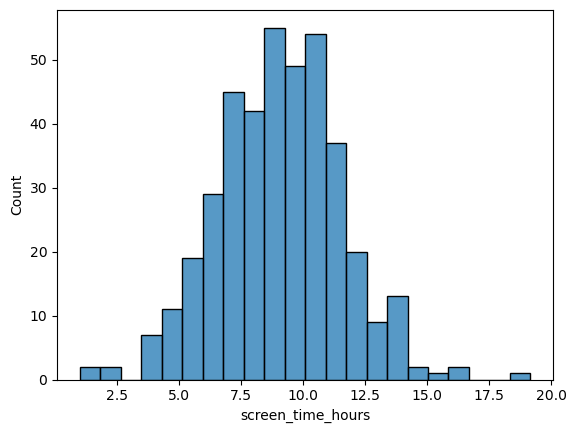

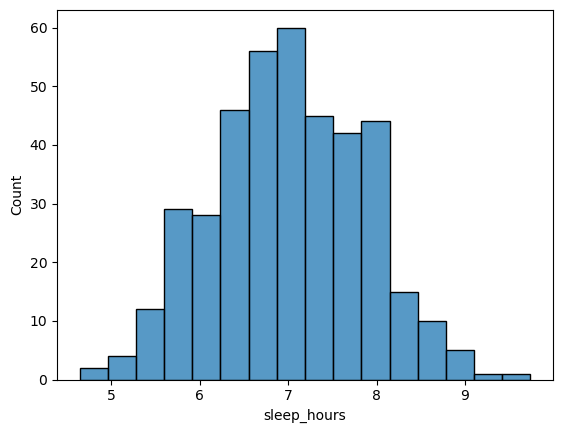

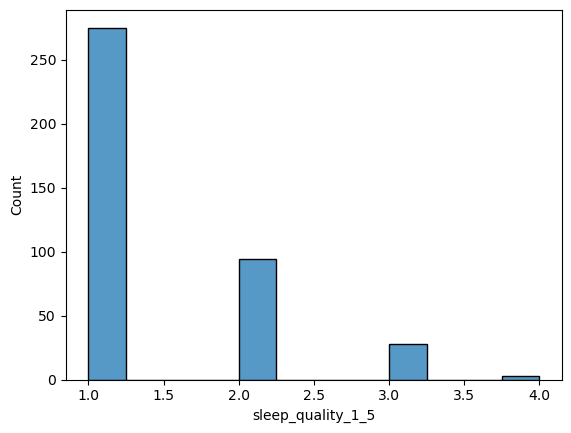

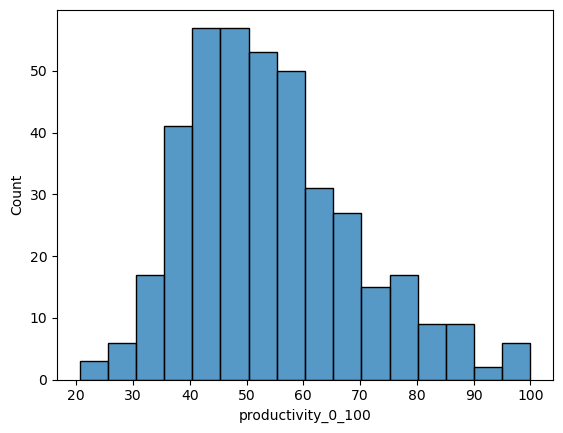

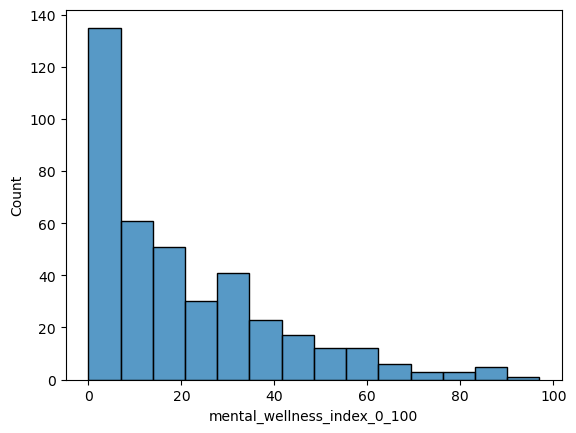

In [21]:
for col in relevant_columns:
    sns.histplot(num[col])
    plt.show()

    

we made a histgram to see the distribution of the most relevant data of our researhes, most of the data is numercal except the sleep qualety 

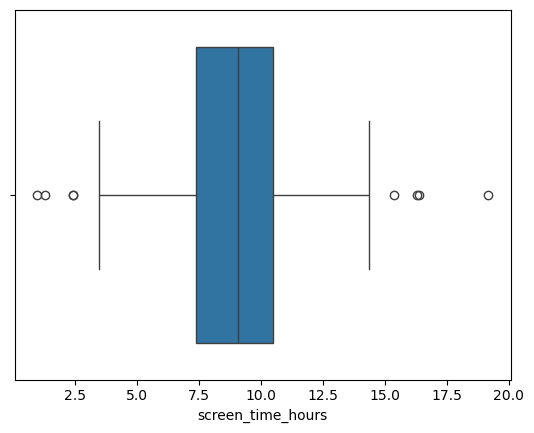

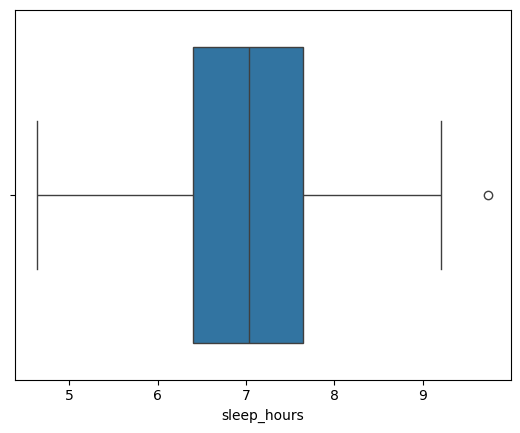

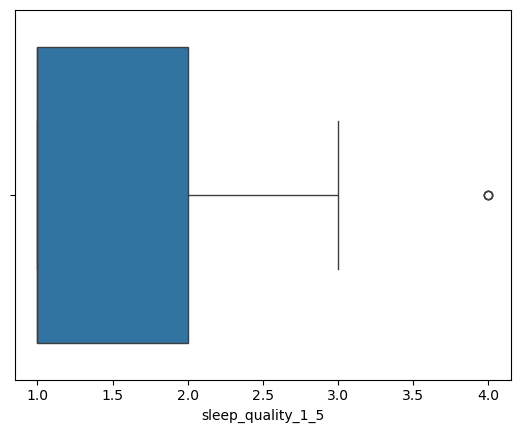

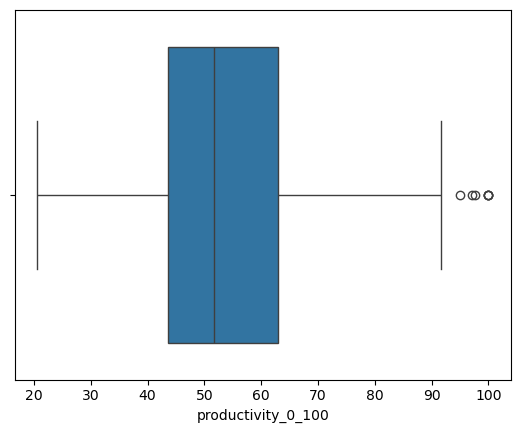

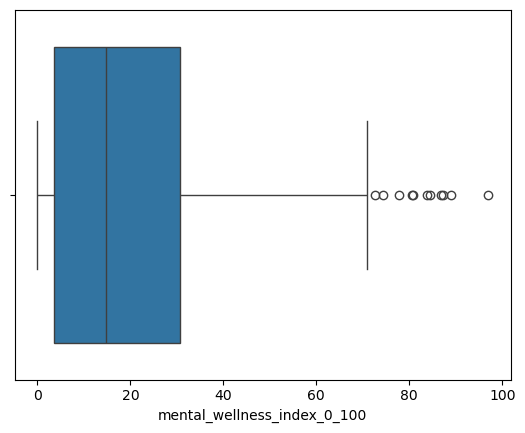

In [22]:
for col in relevant_columns:
    sns.boxplot(data=num , x=col)
    plt.show()

we made box plots to see the sprate of the data and shows the outliners 

In [23]:
cat.head()

,gender,occupation,work_mode
0,Female,Employed,Remote
1,Female,Employed,In-person
2,Female,Employed,Hybrid
3,Male,Employed,Hybrid
4,Male,Student,Remote


In [24]:
count_gender = cat["gender"].value_counts()
count_gender

gender
Female              222
Male                170
Non-binary/Other      8
Name: count, dtype: int64

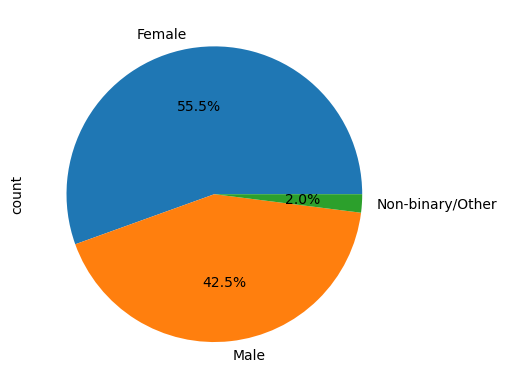

In [25]:
cat["gender"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

we caluclated the catugarical data and we also visualized it in piechart 

In [26]:
count_occ = cat["occupation"].value_counts()
count_occ

occupation
Employed         207
Student          107
Self-employed     45
Unemployed        27
Retired           14
Name: count, dtype: int64

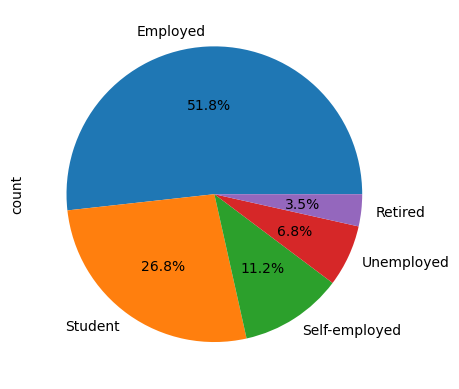

In [27]:
cat["occupation"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

we caluclated the catugarical data and we also visualized it in piechart  bla bla distribution 

In [28]:
count_work = cat["work_mode"].value_counts()
count_work

work_mode
Remote       150
Hybrid       146
In-person    104
Name: count, dtype: int64

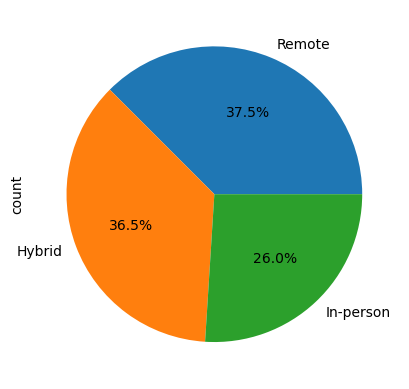

In [29]:
cat["work_mode"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

we caluclated the catugarical data and we also visualized it in piechart  bla bla distribution 

## How does screen time affect the amount and quality of sleep?

In this section we'll analyse what, if any, effect does screen time have on the amount and quality of sleep an individual gets.

The first section to answer this question will explore the data numerically and visually to find trends in the recorded screen time, sleep quality and sleep amount across the data set.

In [30]:
display(df.groupby("sleep_quality_1_5")["screen_time_hours"].count())

sleep_quality_1_5
1    275
2     94
3     28
4      3
Name: screen_time_hours, dtype: int64

Out of the 400 entries in the dataset, 275 individuals recorded their sleep quality as 1, the lowest possible value. 94 people reported a 2, 28 reported a 3, and only 3 people classified their sleep quality as a 4. No entry had the highest possible value, 5, in this column.

In [31]:
display(df.groupby("sleep_quality_1_5")["screen_time_hours"].mean())

sleep_quality_1_5
1    9.484727
2    8.181596
3    7.584643
4    6.740000
Name: screen_time_hours, dtype: float64

The average screen time reported by individuals with the self-reported worst sleep quality is 9.48 hours, followed by 8.18 hours by individuals who reported a 2 in sleep quality. The downward trend continues on with the people with a 3 in sleep quality spending an average of 7.58 hours in front of screens and the individuals with a sleep quality of 4 having an mean screen time of 6.74.

In [32]:
display(df.groupby("sleep_quality_1_5")["work_screen_hours"].mean())

sleep_quality_1_5
1    2.297309
2    2.009255
3    1.795000
4    0.780000
Name: work_screen_hours, dtype: float64

Comparing the average work screen hours of the individuals to their reported sleep quality shows a similar trend as overall screen hours: the better the reported sleep quality is, the less work screen time was recorded. At the worst sleep quality, an average of 2.3 hours of work screen hours was recorded, while at sleep quality 4 this average drops to 0.78 hours.

In [33]:
display(df.groupby("sleep_quality_1_5")["leisure_screen_hours"].mean())

sleep_quality_1_5
1    7.187418
2    6.172340
3    5.789643
4    5.960000
Name: leisure_screen_hours, dtype: float64

The trends in the sleep quality compared to average leisure screen hours maintain a mostly similar trend, though in this comparison the people reporting a sleep quality of 3 spend slightly less time with their screens for leisure than those who reported a 4, 5.79 hours to 5.96 hours. On the other end, the worst sleepers recorded an average of 7.19 leisure screen hours.

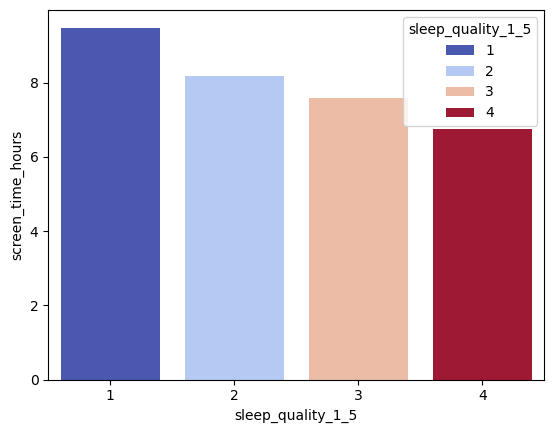

In [34]:
sns.barplot(data=df, y="screen_time_hours", x="sleep_quality_1_5", errorbar=None, palette="coolwarm", hue="sleep_quality_1_5")
plt.show()

The barplot above illustrates the trend of decreasing screen time correlating to improved sleep quality, that the numerical analysis above already suggested.

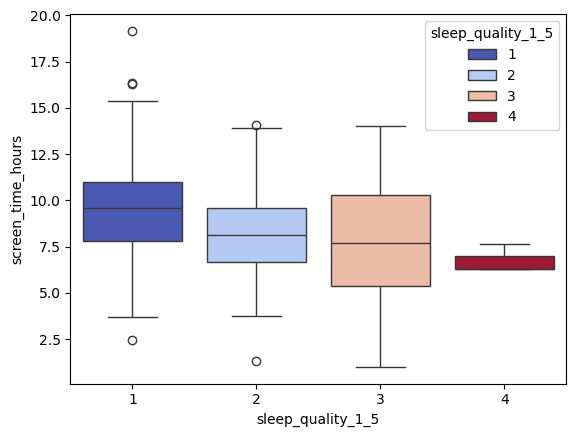

In [35]:
sns.boxplot(data=df, y="screen_time_hours", x="sleep_quality_1_5", palette="coolwarm", hue="sleep_quality_1_5")
plt.show()

The boxplot continues to show the same trend in the correlation of sleep quality and screen time. It also illustrates the wide range of values in the recorded screen time, especially in entries with a lower sleep quality. The variance in sleep quality 4 is very small, and the category has no outliers, with the interquantile range in the other three recorded sleep quality categories is much wider, with some exceptions recorded at sleep qualities 1 and 2, to both directions.

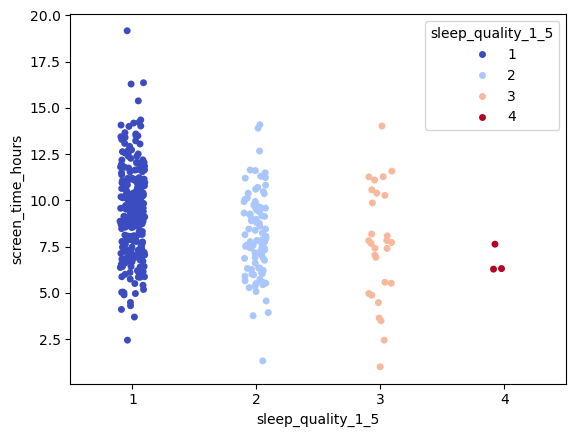

In [36]:
sns.stripplot(data=df,  y="screen_time_hours", x="sleep_quality_1_5",  palette="coolwarm", hue="sleep_quality_1_5")
plt.show()

The strip plot illustrates the much denser occurence of lower sleep qualities, but also that amongst sleep quality categories 1 to 3 the spread of the screen time values is quite wide. The three entries with a recorded sleep quality of four are comparatively closely grouped together.

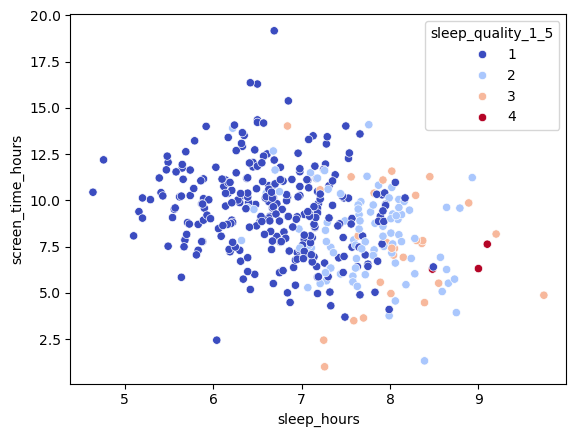

In [37]:
sns.scatterplot(data=df, y="screen_time_hours", x="sleep_hours", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

This scatter plot adds the recorded number of sleep hours into the analysis. This plot illustrates that the amount of sleep may have a larger impact on the quality of sleep recorded, instead of the number of screen hours. The further right on the x-axis we move on the plot, the more higher sleep quality recordings appear, while on the left there are only sleep quality 1s recorded. The first 2s appear between 6 and 7 hours of sleep and the higher values appear more frequently and the 1s appear less frequently as the sleep hours increase. 

### Mathematical correlations

This section will analyse the mathematical correlations between the key variables: screen time, sleep quality and amount of sleep.

In [38]:
# Pearson correlation coefficient

pearson = round(float(df["screen_time_hours"].corr(df["sleep_hours"], method="pearson")), 2)
pearson

-0.33

In [39]:
round(float(df["screen_time_hours"].corr(df["sleep_quality_1_5"], method="pearson")), 2)

-0.28

In [40]:
round(float(df["sleep_hours"].corr(df["sleep_quality_1_5"], method="pearson")), 2)

0.61

The Pearson correlation coefficients show that there is a weak negative correlation between screen time hours and sleep hours, as well as between screen time and sleep quality. There is, however, a much stronger positive linear correlation between the recorded number of sleep hours and sleep quality.

In [41]:
# Spearman correlation coefficient

spearman = round(float(df["screen_time_hours"].corr(df["sleep_hours"], method="spearman")), 2)
spearman

-0.34

In [42]:
round(float(df["screen_time_hours"].corr(df["sleep_quality_1_5"], method="spearman")), 2)

-0.27

In [43]:
round(float(df["sleep_hours"].corr(df["sleep_quality_1_5"], method="spearman")), 2)

0.63

The Spearman correlation coefficients have similar trends as the Pearson correlations: there is a weak, negative monotonic correlation between screen time and sleep hours, and screen time and sleep quality. Here too there is a much stronger positive monotonous correlation between sleep quality and the amount of sleep.

## Types of screen hours: Work vs. Leisure

This section will look further into what trends emerge, if any, when the screen time is split to work time and leisure time.

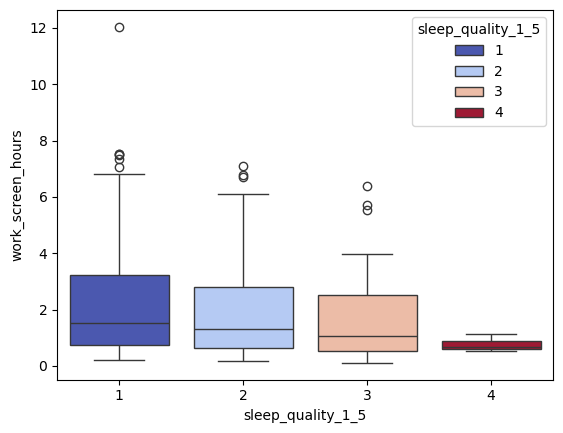

In [44]:
sns.boxplot(data=df, x="sleep_quality_1_5", y="work_screen_hours", palette="coolwarm", hue="sleep_quality_1_5")
plt.show()

The trend between work screen time and sleep quality mimics the trend between sleep quality and general screen time, though it does not present the trend as strongly: less work screen hours corresponds to a higher sleep quality. In general, there is a smaller amount of variation between the work screen times recorded, bringing the categories closer together. The median amount of work screen time across all sleep quality categories recorded is within a span of an hour, unlike in the general screen time categories where the median values spanned a much larger range. The same is also true for the range of values, where the analysed maximum value here is around 12 hours of work screen time, compared to the maximum of nearly 20 hours of general screen time.

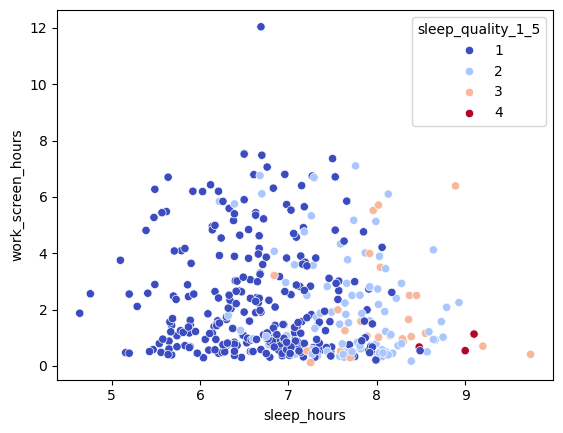

In [45]:
sns.scatterplot(data=df, y="work_screen_hours", x="sleep_hours", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

The scatter plot also shows similar trends to the general screen time trends: the sleep quality appears to still be more affected by the amount of sleep rather than the work screen time.

In [46]:
round(float(df["work_screen_hours"].corr(df["sleep_quality_1_5"], method="pearson")), 2)

-0.1

In [47]:
round(float(df["work_screen_hours"].corr(df["sleep_quality_1_5"], method="spearman")), 2)

-0.1

For the mathematical correlations, both the Pearson and Spearman correlation coefficients are even smaller than the those for general screen time. Both measuring at -0.1 suggest negligible linear and monotonous correlation between work screen hours and the quality of sleep.

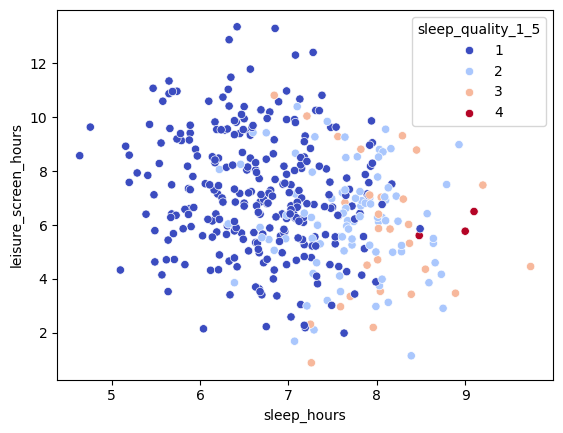

In [48]:
sns.scatterplot(data=df, y="leisure_screen_hours", x="sleep_hours", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

The trend of the amound of sleep having more effect on the quality of sleep holds fast when analysing how the leisure screen time affects the amount and quality of sleep. Again there is little change in sleep quality across the change in leisure screen time, but rather a change is observed as the amount of sleep increases.

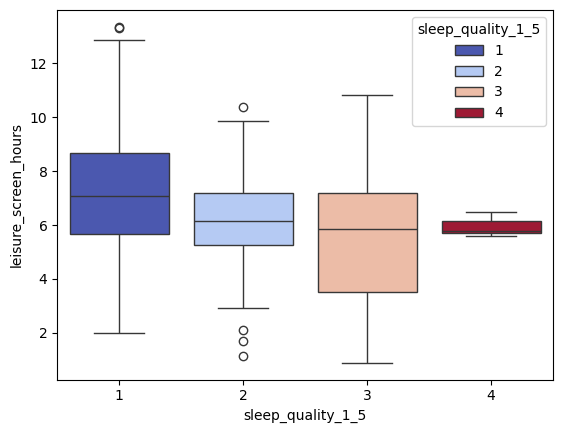

In [49]:
sns.boxplot(data=df, x="sleep_quality_1_5", y="leisure_screen_hours", palette="coolwarm", hue="sleep_quality_1_5")
plt.show()

The boxplot sleep quality in terms of leisure screen time show a close set of median values across all four sleep quality categories, and the median values across sleep qualities 2 to 4 are very close to each other. The variation in values across categories 1 to 3 is however still very vast.

In [50]:
round(float(df["leisure_screen_hours"].corr(df["sleep_quality_1_5"], method="pearson")), 2)

-0.22

In [51]:
round(float(df["leisure_screen_hours"].corr(df["sleep_quality_1_5"], method="spearman")), 2)

-0.22

The mathematical correlations between leisure screen hours and sleep quality are sligthly stronger than those for work screen hours. At -0.22 coefficients in both Pearson and Spearman calculations, we can observe very weak negative correlations betweeen leisure screen time and sleep quality.

## Does Exercise or Social Time in a Week impact sleep quality in relation to screen time?

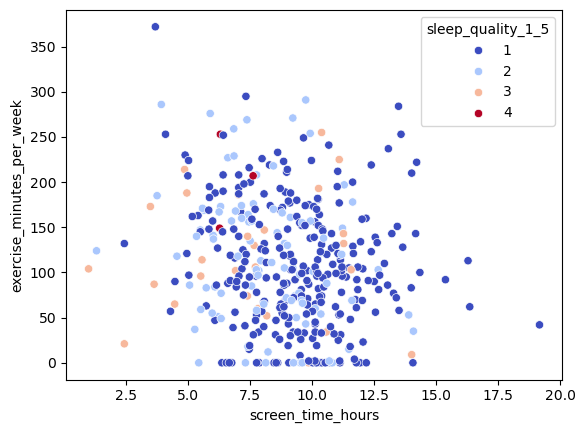

In [52]:
sns.scatterplot(data=df, x="screen_time_hours", y="exercise_minutes_per_week", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

Though there appears to be a small cluster of observations with poor sleep quality that have recorded no exercise minutes in a week, the scatter plot does not show a meaningful trend between sleep quality, screen hours, and exercise minutes in a week.The cluster at 0 exercise minutes has a too wide spread of screen hours to be interpreted with meaning.

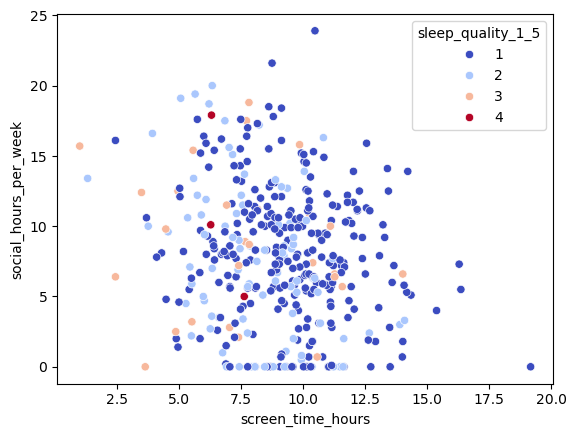

In [53]:
sns.scatterplot(data=df, x="screen_time_hours", y="social_hours_per_week", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

The comparison between social hours in a week, screen time and sleep quality also does not yield significant trends, though there is a cluster of recorded poor sleep at no social hours, but the screen time is oo spread for it to be meaningfully analysied.

# Screen Time vs. Productivity

In [54]:
num[["leisure_screen_hours","work_screen_hours","productivity_0_100"]].corr()


,leisure_screen_hours,work_screen_hours,productivity_0_100
leisure_screen_hours,1.000000,-0.286414,-0.500558
work_screen_hours,-0.286414,1.000000,-0.335697
productivity_0_100,-0.500558,-0.335697,1.000000


In [55]:
general_screen_time = df["leisure_screen_hours"] + df["work_screen_hours"]

num_cols = ["leisure_screen_hours", "work_screen_hours", "productivity_0_100"]

for col in num_cols:
    s = df[col].skew()
    k = df[col].kurtosis()
    print(f"{col:25s}  Skewness: {s:6.2f}   Kurtosis: {k:6.2f}")

# Only for leisure_screen_hours and work_screen_hours
s = general_screen_time.skew()
k = general_screen_time.kurtosis()
print(f"{'\n general_screen_time':25s}  Skewness: {s:6.2f}   Kurtosis: {k:6.2f}")


leisure_screen_hours       Skewness:   0.12   Kurtosis:  -0.11
work_screen_hours          Skewness:   1.32   Kurtosis:   1.51
productivity_0_100         Skewness:   0.71   Kurtosis:   0.35

 general_screen_time      Skewness:   0.08   Kurtosis:   0.70


## Distribution Analysis

- **Leisure screen hours** are quite balanced — most people spend a similar amount of time on leisure screens.  
- **Work screen hours** are very uneven — most spend little time, but a few people spend many hours.  
- **Productivity** is fairly even, with no extreme values.  
- **General screen time** (leisure + work) is a bit higher for some users but mostly stays around the middle range.

Overall, leisure time is consistent, work time varies a lot, and productivity stays fairly stable.

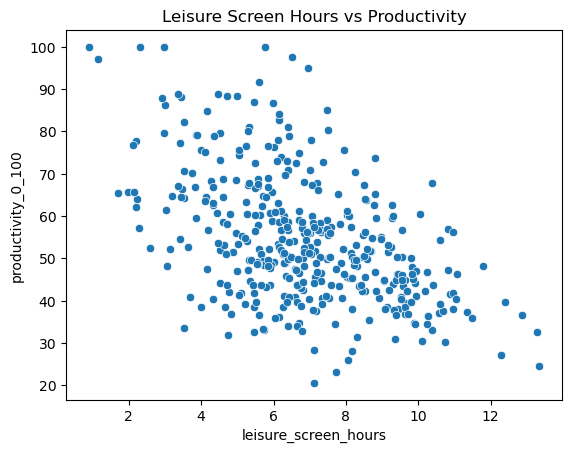

In [56]:

sns.scatterplot(data=df, x="leisure_screen_hours", y="productivity_0_100")
plt.title("Leisure Screen Hours vs Productivity")
plt.show()

## Analysis for Leisure Screen Hours vs Productivity

The data points show a moderate negative relationship between leisure screen time and productivity.
Most observations are concentrated around the mid-range of leisure hours, suggesting that users who spend more time on screens for leisure purposes tend to experience slightly lower productivity.

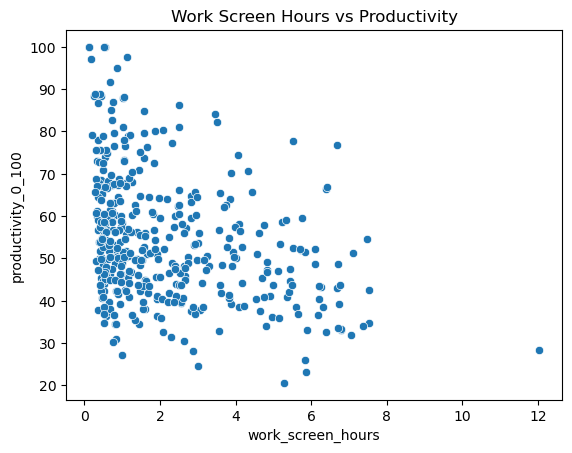

In [57]:

sns.scatterplot(data=df, x="work_screen_hours", y="productivity_0_100")
plt.title("Work Screen Hours vs Productivity")
plt.show()

## Analysis for Word Screen Hours vs Productivity

The distribution is skewed toward lower work screen hours, with most users spending limited time on screens for work and one noticeable high-value outlier (around 12 hours).
The trend line is nearly flat, indicating no strong correlation between work-related screen time and productivity.

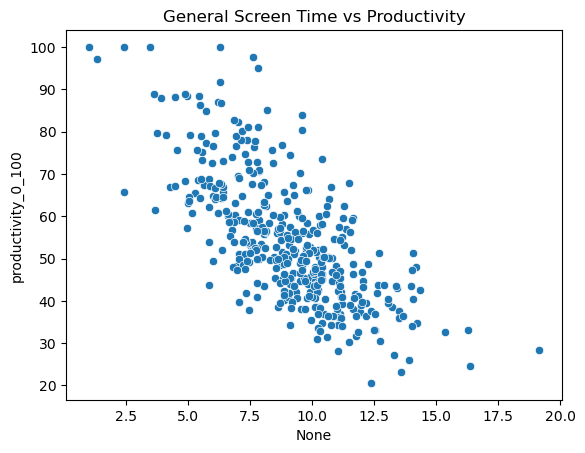

In [58]:
sns.scatterplot(data=df, x=general_screen_time, y="productivity_0_100")
plt.title("General Screen Time vs Productivity")
plt.show()

## Analysis for General time

When combining leisure and work hours, the data shows a weak negative correlation with productivity.
Most points are tightly clustered around the mid-range, suggesting limited variability and a small decline in productivity as total screen time increases

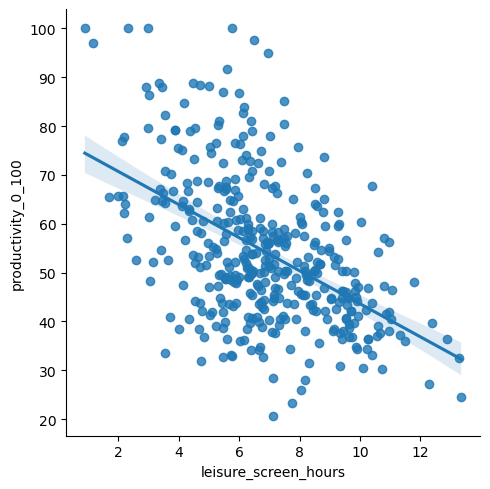

In [59]:
leisure_work_copy = df.copy()
leisure_work_copy["general_screen_time"] = leisure_work_copy["leisure_screen_hours"]+ leisure_work_copy["work_screen_hours"]

sns.lmplot(data=df, x="leisure_screen_hours", y="productivity_0_100")
plt.show()


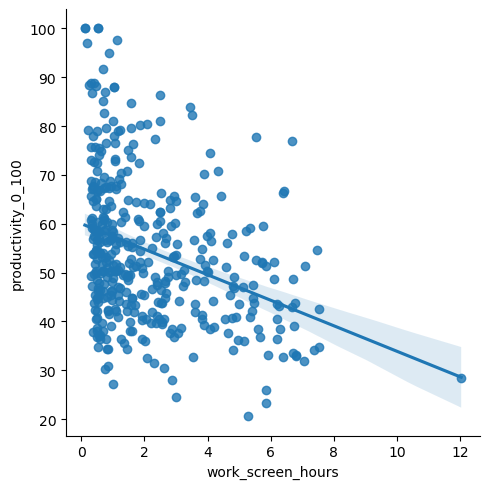

In [60]:
sns.lmplot(data=df, x="work_screen_hours", y="productivity_0_100")
plt.show()

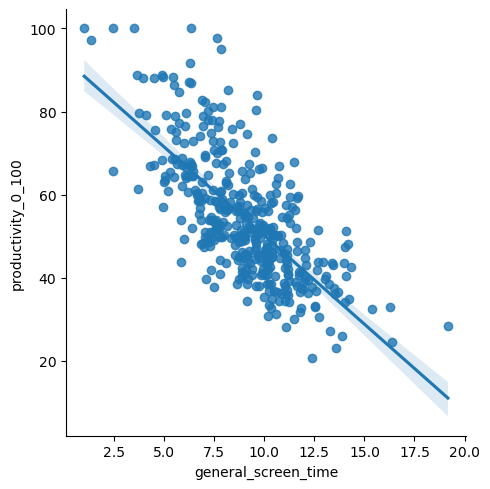

In [61]:
sns.lmplot(data= leisure_work_copy, x="general_screen_time",y="productivity_0_100")

plt.show()

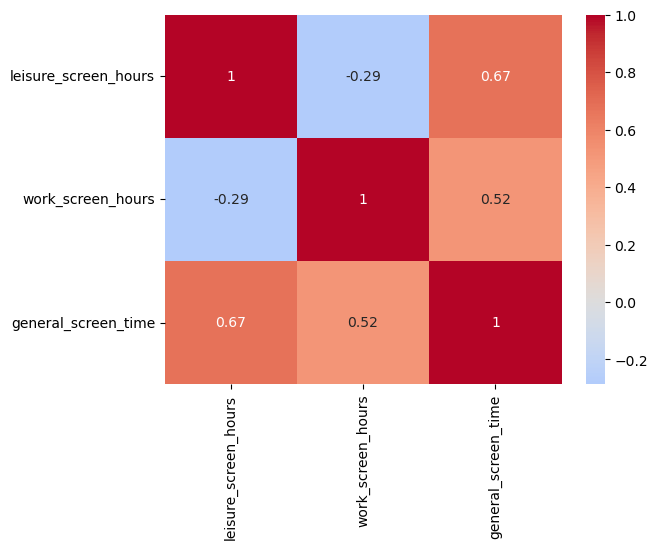

In [62]:
corr_cols = ["leisure_screen_hours","work_screen_hours","general_screen_time"]
corr_matrix = leisure_work_copy[corr_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",center=0)
plt.show()


## Analysis by the heatmap

Leisure vs Work (-0.29): a small inverse relationship — people who spend more time on leisure screens tend to spend a bit less on work screens.

Leisure vs General (0.67): a strong positive relationship — leisure time makes up a large part of total screen time.

Work vs General (0.52): a moderate positive relationship — work screen time also adds to total screen time, but not as much as leisure.


## Insights

People who spend more time on screens for leisure tend to be slightly less productive.

Time spent on screens for work seems to have little or no impact on productivity.

Overall screen time (leisure + work) has a small negative effect on productivity.

Leisure and work screen times are slightly inversely related, suggesting that spending more time on one type of screen tends to reduce the other.

# **How does screen time impact general mental wellness?**

In a sample of 400 people, average screen time is 9 hours/day, while mental wellness scores average just 20 out of 100. A quarter of participants report zero wellness, and the data shows wide variation.
This suggests a possible link: more screen time may be associated with lower mental wellness. Further analysis could help confirm it.




In [63]:
rel_col = ["screen_time_hours","mental_wellness_index_0_100"]
df[rel_col].describe()

,screen_time_hours,mental_wellness_index_0_100
count,400.000000,400.000000
mean,9.024900,20.326750
std,2.491058,20.376793
min,1.000000,0.000000
25%,7.372500,3.675000
50%,9.090000,14.800000
75%,10.495000,30.650000
max,19.170000,97.000000


## Median vs. Density in the Hexbin Plot
The median screen time is 9 hours, and the median mental wellness score is 10. In the hexbin plot, the densest region aligns closely with these values meaning most people fall near this combination.
This overlap suggests that low wellness scores are common even at typical screen time levels, reinforcing a possible negative trend between screen time and mental well-being.


In [64]:
df[rel_col].median()

screen_time_hours               9.09
mental_wellness_index_0_100    14.80
dtype: float64

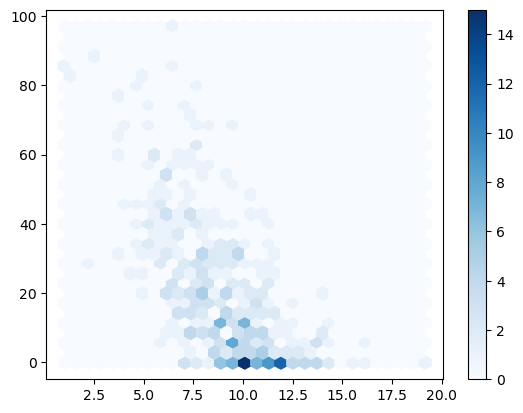

In [65]:
plt.hexbin(df["screen_time_hours"], df["mental_wellness_index_0_100"], gridsize=30, cmap='Blues')
plt.colorbar()
plt.show()

## Correlation Confirms the Pattern
Both Pearson (-0.64) and Spearman (-0.65) correlations show a strong negative relationship between screen time and mental wellness. This backs up what we saw in the hexbin plot: most people cluster around the median screen time (9 hrs) and low wellness scores (10).
In short, the more time spent on screens, the lower the reported mental wellness at least in this dataset.


In [66]:
# Calculating the Pearson correlation coefficient
round(float(df["screen_time_hours"].corr(df["mental_wellness_index_0_100"], method="pearson")), 2)

-0.64

In [67]:
# Calculating the Spearman rank correlation 
round(float(df["screen_time_hours"].corr(df["mental_wellness_index_0_100"], method="spearman")), 2)

-0.65

## Scatter Plot + Histograms: Reinforcing the Trend

The histograms confirm that most participants report high screen time and low wellness, reinforcing the negative correlation we saw earlier.
Together, these visuals and stats paint a consistent picture: more screen time tends to align with lower mental wellness in this dataset.


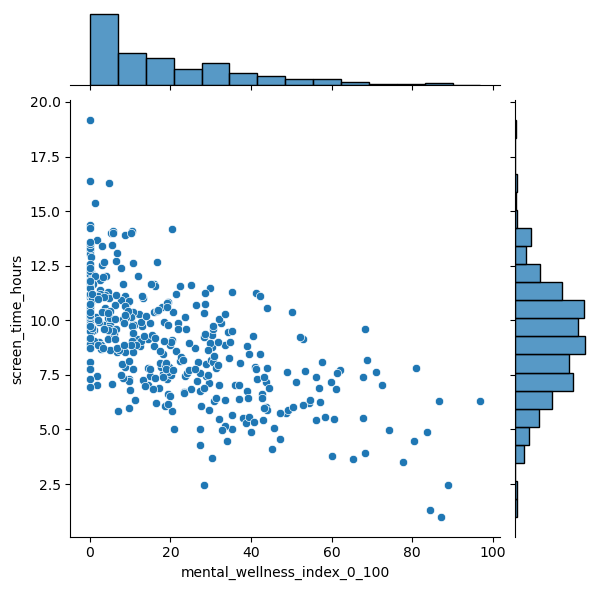

In [68]:
sns.jointplot(y=df["screen_time_hours"], x=df["mental_wellness_index_0_100"])
plt.show()

## Regression Line: Visual Proof of the Trend
The regression line clearly slopes downward, confirming a negative relationship between screen time and mental wellness. Most data points cluster around 9 hours of screen time and low wellness scores, echoing the median values and earlier plots.
The confidence interval adds weight: it shows that the downward trend is statistically consistent across the dataset.


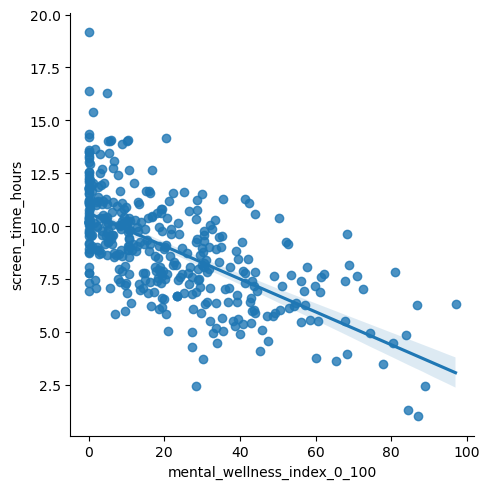

In [69]:
#lm plot 
sns.lmplot(data=df, y= "screen_time_hours", x= "mental_wellness_index_0_100")
plt.show()


## Removed Zero Wellness Scores
In the dataset, 61 entries had a mental wellness score of 0. While that could reflect genuine responses, it’s also possible that 0 was used as a placeholder—either for missing data or skipped questions. To avoid skewing the analysis, we created a version of the plot that excludes these zero values.
The updated scatterplot shows a clearer negative trend: as mental wellness scores increase, screen time tends to decrease. This helps us focus on more reliable data and strengthens the observed relationship.




In [70]:
(df['mental_wellness_index_0_100'] == 0).sum()

np.int64(61)

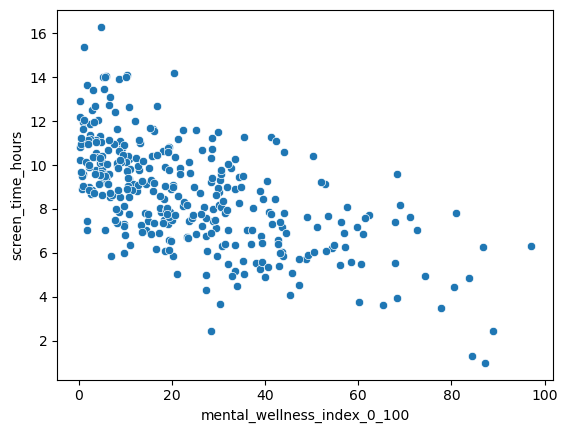

In [71]:
#scatterplot without 0 in ,menatal welness index 
df_new = df.drop(df[df['mental_wellness_index_0_100'] == 0].index)
sns.scatterplot(data=df_new, x= 'mental_wellness_index_0_100' , y ='screen_time_hours')
plt.show()